# Machine Learning with `scikit-learn`

## <img src='imgs/robotguy.png' alt="Smiley face" width="42" height="42" align="left">Learning Objectives
* * *
* Gain some high level knowledge around machine learning with a gentle/brief introduction
* Learn the importance of pre-processing data and how `scikit-learn` expects data
* See data transformations for machine learning in action
* Get an idea of your options for learning on training sets and applying model for prediction
* See what sort of metrics are commonly used in scikit-learn
* Learn options for model evaluation
* Become familiar with ways to make this process robust and simplified (pipelining and tuning parameters)

## Comments 3/28

SOME overarching points:
* Big goal:  make it as easy and painless to learn tensorflow
* Motivate, draw audience in with pictures and maybe jump into EDA or learners (then talk about ML/sklearn etc); motivate through inline exercises or engaging audience with "what next?" questions
* Have ML tips and best practices
* Have sklearn tips and best practices

data preprocessing very big so should mention, but really focus on learners; motivation by seeing some results immediately (Giri)
Speaking - up in the air right now (Kim wouldn't mind handing it off to Giri and/or Jen)
Introduce the math (Jen)

Load data -> excercise -> math behind it -> model eval (for example) (Giri)
External speakers (bring up Weds @ planning meeting) - perhaps Giri could reach out and find someone interested in doing a ML intro (fairly brief, though) (Micheleen)

## A very brief introduction to machine learning

Here's my hand-drawn diagram of the machine learning process:
<img src='imgs/ml_process.png' alt="Smiley face" width="550">

As far as algorithms for learning a model, I like to think of a couple ways to categorize machine learning approaches (with the help of the [machine learning wikipedia article](https://en.wikipedia.org/wiki/Machine_learning)).  The first way of thinking about ML, is by the type of information given to a system.  So, given that criteria there are three classical categories:
1.  Supervised learning - we get the data and the labels
2.  Unsupervised learning - only get the data (no labels)
3.  Reinforcement learning - reward/penalty based information (feedback)

Another way of categorizing ML approaches, is to think of the desired output:
1.  Classification
2.  Regression
3.  Clustering
4.  Density estimation
5.  Dimensionality reduction

--> This second approach is how scikit-learn categorizes it's ML algorithms...and you'll see how it works in this module.

> PRO TIP: Are you a statitician?  Want to talk like a machine learning expert?  Here you go (from the friendly people at SAS ([here](http://www.sas.com/it_it/insights/analytics/machine-learning.html))): 

A Statistician Would Say  | A Machine Learnest Would Say
------------- | -------------
dependent variable  | target
variable  | feature
transformation  | feature creation


## A very brief introduction to scikit-learn (aka `sklearn`)

This module is not meant to be a comprehensive introduction to ML, but rather an introduction to the current de facto tool for ML in python.  As a gentle intro, it is helpful to think of the `sklearn` approach having layers of abstraction.  This famous quote certainly applies:

> Easy reading is damn hard writing, and vice versa. <br>
--Nathaniel Hawthorne

In `sklearn`, you'll find you have a common programming choice: to do things very explicitly, e.g. pre-process data one step at a time, perhaps do a transformation like PCA, split data into traning and test sets, define a classifier or learner with desired parameterss, train the classifier, use the classifier to predict on a test set and then analyze how good it did.  

A different approach and something `sklearn` offers is to combine some or all of the steps above into a pipeline so to speak.  For instance, one could define a pipeline which does all of these steps at one time and perhaps even pits mutlple learners against one another or does some parameter tuning with a grid search (examples will be shown towards the end).  This is what is meant here by layers of abstraction.

So, in this particular module, for the most part, we will try to be explicit regarding our process and give some useful tips on options for a more automated or pipelined approach.  Just note, once you've mastered the explicit approaches you might want to explore `sklearn`'s `GridSearchCV` and `Pipeline` classes.

Here is `sklearn`'s algorithm diagram - (note, this is not an exhaustive list of model options offered in `sklearn`, but serves as a good algorithm guide).
![](imgs/ml_map.png)

### Supervised learning blurb from `sklearn` documentation (direct quote from [here](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html))

#### The problem solved in supervised learning

Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

All supervised estimators in scikit-learn implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations X, returns the predicted labels y.

### Unsupervised learning blurb from a different source (`sklearn`s was not general enough for this section)

#### The problem solved in unsupervised learning
In machine learning, the problem of unsupervised learning is that of trying to find <b>hidden structure</b> in unlabeled data. Since the training set given to the learner is unlabeled, there is no error or reward signal to evaluate a potential solution.  <br><br>--Unsupervised learning entry by the Quora community ([here](https://www.quora.com/topic/Unsupervised-Learning))

### Some glossary terms (quoted directly from `sklearn` documentation) - you will find glossary terms dispersed throughout this module as well


Training set and testing set<br>
Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the training set on which we learn data properties and one that we call the testing set on which we test these properties. (from [here](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction))

Classification and regression (Supervised learning)<br>
If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a classification task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a regression task.
When doing classification in scikit-learn, y is a vector of integers or strings.
Note: See the Introduction to machine learning with scikit-learn Tutorial for a quick run-through on the basic machine learning vocabulary used within scikit-learn. (from [here](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html))

TODO: add more glossary terms (i.e. for unsupervised)



## comments 3/28
2 nbs: one w/ content+code, other one glossary (to switch back n forth) (Alain)

### Preprocessing the Input Data

#### `sklearn` needs data and features (aka columns with optional labels) in numpy arrays (aka ndarrays)

<b>Commonly, machine learning algorithms will require your data to be standardized and preprocessed.  In `sklearn` the data must also take on a certain structure as well.</b>

<p>What you might have to do before using a learner in `sklearn`:</p>
1. Non-numerics transformed to numeric (tip: use applymap() method from `pandas`)
* Fill in missing values
* Standardization
* Normalization
* Encoding categorical features (e.g. one-hot encoding or dummy variables)

<b>Features should end up in a numpy.ndarray (hence numeric) and labels in a list.</b>

Data options:
* Use pre-processed [datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) from scikit-learn
* [Create your own](http://scikit-learn.org/stable/datasets/index.html#sample-generators)
* Read from a file

If you use your own data or "real-world" data you will likely have to do some data wrangling and need to leverage `pandas` for some data manipulation.

## comments 3/28
tips sections in pre-processing & quick refs (Giri, Micheleen)

put glossary and extra content all at end (Micheleen)

### Comments
Add some talking points about cross validation, why you want to do it, etc. (kendall)
Add some description on what diabetes data set is. Show a few rows of the data, and explain what the columns are. Helps to visualize the data. 

What is train_test_split? What do you mean by manual? (Kim) SKLearn provides abstractions using 

When splitting into train, test, validation, do you get the three sets? (Kim) Answer: No, it's handled by SKLearn. You have more customized control (Micheleen)

What is the score? (Kim) Each is a test run. Values are 0 to 1. Higher is better. (Micheleen)

Maybe need a higher general-level ML overview, flow chart of steps? Preprocessing, data splitting, cross validation, etc in a flowchart. AI: Search for a flowchart online (CK)

## Let's Dive In!

## Comments 3/28

ask the question/frame the question/write a program to answer this; need the data (talk about dataset); need the algorithms (talk about kmeans for e.g.)...did we answer our question correctly? then, eval model...(Giri)

Best ML practices/tips throughout (Micheleen)

> <b>ML TIP:  Ask sharp questions.</b><br>e.g. What type of flower is this (pictured below) closest to of the three given classes?

(This links out to source)
<a href="http://www.madlantern.com/photography/wild-iris/"><img border="0" alt="iris species" src="imgs/iris-setosa.jpg" width="400" height="400"></a>

### Labels (species names/classes):
(This links out to source)
<a href="http://articles.concreteinteractive.com/machine-learning-a-new-tool-for-humanity/"><img border="0" alt="iris species" src="imgs/irises.png" width="500" height="500"></a>

### Get to know the data - visualize and explore
* Features (columns/measurements) come from this diagram (links out to source on kaggle):
<a href="http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/"><img border="0" alt="iris data features" src="imgs/iris_petal_sepal.png" width="200" height="200"></a>
* Shape
* Peek at data
* Summaries

## Comments 3/28

Time for presenting vs. time for exercises/practices (tradeoff) and how to mix; e.g. audience guesses what's next... (Alain)

How would you like to learn? (Micheleen)

<b>Shape and representation<b>

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# How many data points (rows) x how many features (columns)
print(iris.data.shape)
print(iris.target.shape)

# What python object represents
print(type(iris.data))
print(type(iris.target))

<b>Sneak a peek at data (a reminder of your `pandas` dataframe methods)<b>

In [123]:
# convert to pandas df (adding real column names)
iris.df = pd.DataFrame(iris.data, 
                       columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])


# first few rows
iris.df.head()

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

<b>Describe the dataset with some summary statitsics<b>

In [ ]:
# summary stats
iris.df.describe()

### Get the data ready - clean up
* We don't have to do much with the `iris` dataset.  It has no missing values.  It's already in numpy arrays and has the correct shape for `sklearn`.  However we could try <b>standardization</b> and/or <b>normalization</b>. (later, in the transforms section, we will show one hot encoding, a preprocessing step)

#### Standardization - make our data look like a standard Gaussian distribution (commonly needed for `sklearn` learners)

> FYI: you'll commonly see the data or feature set (ML word for data without it's labels) represented as a capital <b>X</b> and the targets or labels (if we have them) represented as a lowercase <b>y</b>.  This is because the data is a 2D array or list of lists and the targets are a 1D array or simple list.

In [ ]:
# Standardization aka scaling
from sklearn import preprocessing, datasets

# make sure we have iris loaded
iris = datasets.load_iris()

X, y = iris.data, iris.target

# scale it to a gaussian distribution
X_scaled = preprocessing.scale(X)

# how does it look now
pd.DataFrame(X_scaled).head()

In [ ]:
# let's just confirm our standardization worked (mean is 0 w/ unit variance)
pd.DataFrame(X_scaled).describe()

# also could:
#print(X_scaled.mean(axis = 0))
#print(X_scaled.std(axis = 0))

> PRO TIP: To save our standardization and reapply later (say to the test set or some new data), create a transformer object like so:
```python
scaler = preprocessing.StandardScaler().fit(X_train)
# apply to a new dataset (e.g. test set):
scaler.transform(X_test)
```

#### Normalization - scaling samples <i>individually</i> to have unit norm
* This type of scaling is really important if doing some downstream transformations and learning (see sklearn docs [here](http://scikit-learn.org/stable/modules/preprocessing.html#normalization) for more) where similarity of pairs of samples is examined
* A basic intro to normalization and the unit vector can be found [here](http://freetext.org/Introduction_to_Linear_Algebra/Basic_Vector_Operations/Normalization/)

In [ ]:
# Standardization aka scaling
from sklearn import preprocessing, datasets

# make sure we have iris loaded
iris = datasets.load_iris()

X, y = iris.data, iris.target

# scale it to a gaussian distribution
X_norm = preprocessing.normalize(X, norm='l1')

# how does it look now
pd.DataFrame(X_norm).tail()

In [ ]:
# let's just confirm our standardization worked (mean is 0 w/ unit variance)
pd.DataFrame(X_norm).describe()

# cumulative sum of normalized and original data:
#print(pd.DataFrame(X_norm.cumsum().reshape(X.shape)).tail())
#print(pd.DataFrame(X).cumsum().tail())

# unit norm (convert to unit vectors) - all row sums should be 1 now
X_norm.sum(axis = 1)

> PRO TIP: To save our normalization (like standardization above) and reapply later (say to the test set or some new data), create a transformer object like so:
```python
normalizer = preprocessing.Normalizer().fit(X_train)
# apply to a new dataset (e.g. test set):
normalizer.transform(X_test) 
```

### Make the learning easier or better  beforehand -  feature creation/selection
* PCA
* SelectKBest
* One-Hot Encoder

#### Principal component analysis (aka PCA) reduces the dimensions of a dataset down to get the most out of the information without a really big feature space
* Useful for very large feature space (e.g. say the botanist in charge of the iris dataset measured 100 more parts of the flower and thus there were 104 columns instead of 4)
* More about PCA on wikipedia [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

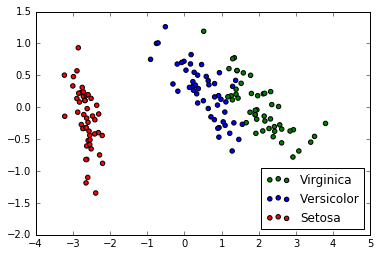

In [124]:
# PCA for dimensionality reduction

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()

X, y = iris.data, iris.target

# perform principal component analysis
pca = decomposition.PCA(n_components = 3)
pca.fit(X)
X_t = pca.transform(X)
(X_t[:, 0])

# import numpy and matplotlib for plotting (and set some stuff)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

# let's separate out data based on first two principle components
x1, x2 = X_t[:, 0], X_t[:, 1]


# please don't worry about details of the plotting below 
#  (will introduce in different module)
#  (note: you can get the iris names below from iris.target_names, also in docs)

s1 = ['r' if v == 0 else 'b' if v == 1 else 'g' for v in y]
s2 = ['Setosa' if v == 0 else 'Versicolor' if v == 1 else 'Virginica' for v in y]
classes = s2
colors = s1
for (i, cla) in enumerate(set(classes)):
    xc = [p for (j, p) in enumerate(x1) if classes[j] == cla]
    yc = [p for (j, p) in enumerate(x2) if classes[j] == cla]
    cols = [c for (j, c) in enumerate(colors) if classes[j] == cla]
    plt.scatter(xc, yc, c = cols, label = cla)
plt.legend(loc = 4)

EXERCISE IDEA:  Normalize data then rerun PCA and plot.  What changes?

SOLUTION

In [ ]:
# Solution to exercise idea
...code here...

#### Selecting k top scoring features (also dimensionality reduction)

In [ ]:
# SelectKBest for selecting top-scoring features

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2

iris = datasets.load_iris()
X, y = iris.data, iris.target

print(X.shape)

# Do feature selection
#  input is scoring function (here chi2) to get univariate p-values
#  and number of top-scoring features (k) - here we get the top 2
X_t = SelectKBest(chi2, k = 2).fit_transform(X, y)

print(X_t.shape)

<b>Note on scoring function selection in `SelectKBest` tranformations:</b>
* For regression - f_regression
* For classification - chi2, f_classif

#### One Hot Encoding
* It's an operation on feature labels - a method of dummying variable
* Expands the feature space by nature of transform - later this can be processed further with a dimensionality reduction (the dummied variables are now their own features)
* FYI:  One hot encoding variables is needed for python ML module `tenorflow`
* The code cell below should help make this clear

In [ ]:
# OneHotEncoder for dummying variables

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

data = pd.DataFrame({'index': range(1, 7),
                    'state': ['WA', 'NY', 'CO', 'NY', 'CA', 'WA']})
print(data)

# We encode both our categorical variable and it's labels
enc = OneHotEncoder()
label_enc = LabelEncoder() # remember the labels here

# Encode labels (can use for discrete numerical values as well)
data_label_encoded = label_enc.fit_transform(data['state'])
data['state'] = data_label_encoded

# Encode and "dummy" variables
data_feature_one_hot_encoded = enc.fit_transform(data[['state']])

# Put into dataframe to look nicer and decode state dummy variables to original state values
# TRY:  compare the original input data (look at row numbers) to one hot encoding results
#   --> do they match??
pd.DataFrame(data_feature_one_hot_encoded.toarray(), columns = label_enc.inverse_transform(range(4)))

In [ ]:
# Encoded labels as dummy variables
print(data_label_encoded)

# Decoded
print(label_enc.inverse_transform(data_label_encoded))

EXERCISE IDEA:  Use one hot encoding to "recode" the iris data's extra suprise column (we are going to add a categorical variable here to play with...)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

a = pd.DataFrame(X, 
                columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])

col5 = pd.DataFrame(np.random.randint(1, 4, size = len(y)))

X_plus = pd.concat([a, col5], axis = 1)
X_plus.head(20)

# ...now one-hot-encode...

### Learning and Predictions

#### Let's start with an example of supervised learning

>  Reminder:  All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y. (direct quote from `sklearn` docs)

* Using regression and classification to train on a dataset, create a model, and predict on new data

### Comment
Maybe move learning and predictions section to the top? Also should move the cheat-sheet to the top. (Kim)

Having the picture of the handwriting dataset is really nice (Kim)

Might want to have a short guide on Jupyter (what is Jupyter, notebooks, etc) -- (Kim)

> "Often the hardest part of solving a machine learning problem can be finding the right estimator for the job."

> "Different estimators are better suited for different types of data and different problems."

<a href = "http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html" style = "float: right">-Choosing the Right Estimator from sklearn docs</a>


<b>An estimator for recognizing a new iris from its measurements</b>

> Or, in machine learning parlance, we <i>fit</i> an estimator on known samples of the iris measurements to <i>predict</i> the class to which an unseen iris belongs.

Let's give it a try!  (We are actually going to hold out a small percentage of the `iris` dataset and check our predictions against the labels)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import svm

# Let's load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# split data into training and test sets using the handy train_test_split func
# in this split, we are "holding out" only one value and label (placed into X_test and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1)

# Define an estimator instance (here, support vector classification)
#   this just means giving our instance a name and setting the parameters
clf = svm.SVC(gamma = 0.001, C = 100.)

# We can now fit and predict with this object instance

In [ ]:
# Let's fit the data to the SVC instance object
clf.fit(X_train, y_train)

In [ ]:
# Let's predict on our "held out" sample
y_pred = clf.predict(X_test)

In [ ]:
# What was the label associated with this test sample? ("held out" sample's original label)
#  fill in the blank below

# how did our prediction do?
print("Prediction: %d, Original label: %d" % (res[0], ___))

<p>We can be explicit and use the `train_test_split` method in scikit-learn ( [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) ) as in (and as shown above for `iris` data):<p>

```python
# Create some data by hand and place 70% into a training set and the rest into a test set
# Here we are using labeled features (X - feature data, y - labels) in our made-up data
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
```

OR

Be more concise and

```python
import numpy as np
from sklearn import cross_validation, linear_model
X, y = np.arange(10).reshape((5, 2)), range(5)
clf = linear_model.LinearRegression()
score = cross_validation.cross_val_score(clf, X, y)
```

<p>There is also a `cross_val_predict` method to create estimates rather than scores ( [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_predict.html) )

#### Let's move on to an example of unsupervised learning

>  Reminder:  In machine learning, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the training set given to the learner is unlabeled, there is no error or reward signal to evaluate a potential solution. Basically, we are just finding a way to represent the data and get as much information from it that we can.

HEY!  Remember PCA from above?  PCA is actually considered unsupervised learning.  We just put it up there because it's a good way to visualize data at the beginning of the ML process.

We are going to continue to use the `iris` dataset (however we won't be needed the targets or labels)

In [ ]:
# TODO: explain Kmeans clustering of iris code below

from sklearn import cluster, datasets

# data
iris = datasets.load_iris()
X, y = iris.data, iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

# how do our original labels fit into the clusters we found?
print(k_means.labels_[::10])
print(y[::10])


EXERCISE IDEA:  Iterate over different number of clusters, n_clusters param, in Kmeans

### Get some feedback cross-validation and metrics
* <b>Confusion matrix</b> - visually inspect quality of a classifier's predictions (more [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)) - very useful to see if a particular class is problematic

<b>Here, we will process some data, classify it with SVM (see [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) for more info), and view the quality of the classification with a confusion matrix.</b>

### Comments
What are precision and recall? (Kendall)
Why is it called a confusion matrix? 
Describe what iris data set is, what the labels are, irises are flowers. (Kim)
Might want to show the numbers in addition to the heat map
Also might want to show a Yes No (True Positives, False Positives) example. (David)

In [ ]:
import numpy as np

# import model algorithm and data
from sklearn import svm, datasets

# import splitter
from sklearn.cross_validation import train_test_split

# import metrics
from sklearn.metrics import confusion_matrix

# feature data (X) and labels (y)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 42)

In [ ]:
# perform the classification step and run a prediction on test set from above
clf = svm.SVC(kernel = 'linear', C = 0.01)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
# Define a plotting function confusion matrices 
#  (from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, target_names, title = 'The Confusion Matrix', cmap = plt.cm.YlOrRd):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.tight_layout()
    
    # Add feature labels to x and y axes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.colorbar()

Numbers in confusion matrix:
* on-diagonal - counts of points for which the predicted label is equal to the true label
* off-diagonal - counts of mislabeled points

In [ ]:
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)

# see the actual counts
print(cm)

# visually inpsect how the classifier did matching predictions to true labels
plot_confusion_matrix(cm, iris.target_names)

* <b>Classification reports</b> - a text report with important classification metrics (e.g. precision, recall)

# Comments
Precision is low variability. (Micheleen)
Recall is TP / (TP + FN) is also called sensitivity. 
f1-score ??? 2x precision / (precision + recall)
Might want to not include classification report, because we have to explain all the terms (Kendall)

In [ ]:
from sklearn.metrics import classification_report

# Using the test and prediction sets from above
print(classification_report(y_test, y_pred, target_names = iris.target_names))

In [ ]:
# Another example with some toy data

y_test = ['cat', 'dog', 'mouse', 'mouse', 'cat', 'cat']
y_pred = ['mouse', 'dog', 'cat', 'mouse', 'cat', 'mouse']

# How did our predictor do?
print(classification_report(y_test, y_pred, target_names = y_test))

EXERCISE IDEA:  Normaize or standardize data and reclassify and show confusion matrix.
* something like [this](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

### Evaluating Models and Under/Over-Fitting)
* Over-fitting or under-fitting can be visualized as below and tuned as we will see later with `GridSearchCV` paramter tuning
* A <b>validation curve</b> gives one an idea of the relationship of model complexity to model performance.
* For this examination it would help to understand the idea of the [<b>bias-variance tradeoff</b>](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).
* A <b>learning curve</b> helps answer the question of if there is an added benefit to adding more training data to a model.  It is also a tool for investigating whether an estimator is more affected by variance error or bias error.

### Comments

Might want to gloss over the code and focus on the visual, since we might not have too much time to go over everything.

In [ ]:
import numpy as np
from sklearn import cross_validation

# Let's run a prediction on some test data given a trained model

# First, create some data
X = np.sort(np.random.rand(20))
func = lambda x: np.cos(1.5 * np.pi * x)
y = np.array([func(x) for x in X])

In [ ]:
# A plotting function

import matplotlib.pyplot as plt
%matplotlib inline

def plot_fit(X_train, y_train, X_test, y_pred):
    plt.plot(X_test, y_pred, label = "Model")
    plt.plot(X_test, func(X_test), label = "Function")
    plt.scatter(X_train, y_train,  label = "Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))

### Easy reading...create and use a pipeline

> <b>Pipelining</b> (as an aside to this section)
* `Pipeline(steps=[...])` - where steps can be a list of processes through which to put data or a dictionary which includes the parameters for each step as values
* For example, here we do a transformation (SelectKBest) and a classification (SVC) all at once in a pipeline we set up

```python
# a feature selection instance
selection = SelectKBest(chi2, k = 2)

# classification instance
clf = svm.SVC(kernel = 'linear')

# make a pipeline
pipeline = Pipeline([("feature selection", selection), ("classification", clf)])

# train the model
pipeline.fit(X, y)
```

See a full example [here](http://scikit-learn.org/stable/auto_examples/feature_stacker.html)

Note:  If you wish to perform <b>multiple transformations</b> in your pipeline try [FeatureUnion](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 1, include_bias = False)
lm = LinearRegression()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("polynomial_features", poly),
                         ("linear_regression", lm)])
pipeline.fit(X[:, np.newaxis], y)


X_test = np.linspace(0, 1, 100)

y_pred = pipeline.predict(X_test[:, np.newaxis])

plot_fit(X, y, X_test, y_pred)

### Last, but not least, Searching Parameter Space with `GridSearchCV`

### Comments 
Should remove this part for the Google workshop (Micheleen)

In [ ]:
from sklearn.grid_search import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(include_bias = False)
lm = LinearRegression()

pipeline = Pipeline([("polynomial_features", poly),
                         ("linear_regression", lm)])

param_grid = dict(polynomial_features__degree = list(range(1, 30, 2)),
                  linear_regression__normalize = [False, True])

grid_search = GridSearchCV(pipeline, param_grid=param_grid)
grid_search.fit(X[:, np.newaxis], y)
print(grid_search.best_params_)

### Some References
* [The iris dataset and an intro to sklearn explained on the Kaggle blog](http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/)
* [A. Mueller's Conference Notebooks and Presentation](https://github.com/amueller/odscon-sf-2015)
* [Katie Malone's real-world example set of notebooks for learning ML](https://github.com/cmmalone/malone_OpenDataSciCon)
* [Jake VanDerplas's PyCon Scikit-learn youtube video](https://www.youtube.com/watch?v=L7R4HUQ-eQ0)
* [Brandon Rohrer's webinar Data Science for the Rest of Us](https://channel9.msdn.com/blogs/Cloud-and-Enterprise-Premium/Data-Science-for-Rest-of-Us)

### Some Datasets
* [Machine learning datasets](http://mldata.org/)
* [Make your own with sklearn](http://scikit-learn.org/stable/datasets/index.html#sample-generators)
* [Kaggle datasets](https://www.kaggle.com/datasets)